In [39]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

array([[1.]])

In [60]:
# loading data
data = np.loadtxt('data1.txt',delimiter=',')
# npy: np.load_npy
# excel: pd.read_excel
# csv: pd.read_csv
print(data.dtype)
# print(data.shape)
num_feature = data.shape[1] - 1
data = data.astype('float32')
print(data)
47*0.7

# tuple

float64
[[2.10400e+03 3.00000e+00 3.99900e+05]
 [1.60000e+03 3.00000e+00 3.29900e+05]
 [2.40000e+03 3.00000e+00 3.69000e+05]
 [1.41600e+03 2.00000e+00 2.32000e+05]
 [3.00000e+03 4.00000e+00 5.39900e+05]
 [1.98500e+03 4.00000e+00 2.99900e+05]
 [1.53400e+03 3.00000e+00 3.14900e+05]
 [1.42700e+03 3.00000e+00 1.98999e+05]
 [1.38000e+03 3.00000e+00 2.12000e+05]
 [1.49400e+03 3.00000e+00 2.42500e+05]
 [1.94000e+03 4.00000e+00 2.39999e+05]
 [2.00000e+03 3.00000e+00 3.47000e+05]
 [1.89000e+03 3.00000e+00 3.29999e+05]
 [4.47800e+03 5.00000e+00 6.99900e+05]
 [1.26800e+03 3.00000e+00 2.59900e+05]
 [2.30000e+03 4.00000e+00 4.49900e+05]
 [1.32000e+03 2.00000e+00 2.99900e+05]
 [1.23600e+03 3.00000e+00 1.99900e+05]
 [2.60900e+03 4.00000e+00 4.99998e+05]
 [3.03100e+03 4.00000e+00 5.99000e+05]
 [1.76700e+03 3.00000e+00 2.52900e+05]
 [1.88800e+03 2.00000e+00 2.55000e+05]
 [1.60400e+03 3.00000e+00 2.42900e+05]
 [1.96200e+03 4.00000e+00 2.59900e+05]
 [3.89000e+03 3.00000e+00 5.73900e+05]
 [1.10000e+03 3.0

32.9

In [58]:
# data normalization
# data_norm = data.copy()
# maximum = np.max(data_norm,axis=0,keepdims=True)
# print(maximum)
# minimun = np.min(data_norm,axis=0,keepdims=True)
# data_norm = (data_norm - minimun)/(maximum - minimun)
# print(data_norm)

In [127]:
# train val split
data_train, data_test = train_test_split(data, test_size=0.3, random_state=42)

# data normalization
data_norm = data_train.copy()
maximum = np.max(data_norm,axis=0,keepdims=True)
# print(maximum)
minimun = np.min(data_norm,axis=0,keepdims=True)

data_train = (data_train - minimun)/(maximum - minimun)
data_test = (data_test - minimun)/(maximum - minimun)

X_train = data_train[:, :2]
X_train = np.concatenate((X_train, np.ones((X_train.shape[0],1))), axis=1)
print(X_train)
y_train = data_train[:, 2]
X_test = data_test[:, :2]
X_test = np.concatenate((X_test, np.ones((X_test.shape[0],1))), axis=1)
y_test = data_test[:, 2]

[[1.         1.         1.        ]
 [0.10590182 0.5        1.        ]
 [0.         0.25       1.        ]
 [0.39933813 0.75       1.        ]
 [0.1770546  0.5        1.        ]
 [0.12906784 0.25       1.        ]
 [0.49227798 0.5        1.        ]
 [0.32763377 0.75       1.        ]
 [0.27578598 0.75       1.        ]
 [0.34528404 0.5        1.        ]
 [0.04081633 0.         1.        ]
 [0.27220076 0.25       1.        ]
 [0.31246552 0.75       1.        ]
 [0.31660232 0.5        1.        ]
 [0.26447877 0.75       1.        ]
 [0.20628792 0.5        1.        ]
 [0.38223937 0.5        1.        ]
 [0.2857143  0.25       1.        ]
 [0.42691672 0.5        1.        ]
 [0.1613348  0.5        1.        ]
 [0.30612245 0.75       1.        ]
 [0.35300606 0.75       1.        ]
 [0.30005515 0.75       1.        ]
 [0.20739107 0.5        1.        ]
 [0.48455599 0.75       1.        ]
 [0.09680089 0.5        1.        ]
 [0.25234419 0.5        1.        ]
 [0.15857695 0.5        1.  

In [163]:
# model init
w = np.random.rand(num_feature+1,1)

# gradient descent
def L2_loss(y_pred,y):
    return np.mean(np.square(y_pred-y))

iterations = 100000
lr = 0.01
a = np.ones((1,1))
print(a.shape)

(1, 1)


In [164]:
log = []
test_log = []
for i in range(iterations):
    y_pred = np.matmul(X_train, w)
    term = lr*np.mean((y_pred-y_train.reshape(-1,1))*X_train, axis=0).reshape(-1,1) 
    w -= term
    y_test_pred = np.matmul(X_test, w)
    loss = L2_loss(y_pred.reshape(-1,1),y_train.reshape(-1,1))
    test_loss = L2_loss(y_test_pred.reshape(-1,1),y_test.reshape(-1,1))
    if i % 100 == 0:
#         print('iter:{},loss:{}'.format(i,loss))
        log.append([i,loss])
        test_log.append([i,test_loss])

In [165]:
# normal eqution
term = np.matmul(X_train.T, X_train)
term_inv = np.linalg.inv(term)
w2 = np.matmul(np.matmul(term_inv,X_train.T),y_train.reshape(-1,1))
print(w2)
print(w)

[[ 0.89707607]
 [-0.02132246]
 [ 0.01620799]]
[[ 0.89707601]
 [-0.0213224 ]
 [ 0.01620797]]


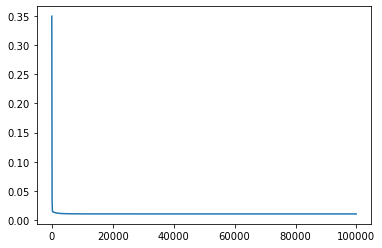

In [166]:
# loss curve visualization
log = np.array(log)
plt.plot(log[:,0],log[:,1])

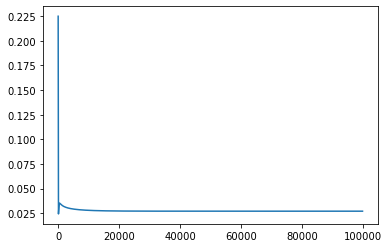

In [167]:
# loss curve visualization
test_log = np.array(test_log)
plt.plot(test_log[:,0],test_log[:,1])

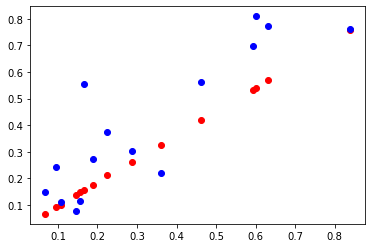

In [168]:
# visualization
y_pred = np.matmul(X_test, w)
plt.scatter(X_test[:,0],y_pred,c='r')
plt.scatter(X_test[:,0],y_test,c='b')

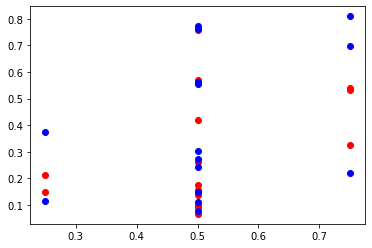

In [169]:
plt.scatter(X_test[:,1],y_pred,c='r')
plt.scatter(X_test[:,1],y_test,c='b')